In [17]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 42 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,283 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: fall

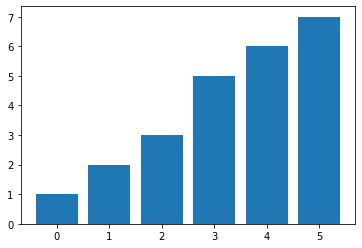

In [1]:
#막대그래프 그리기
#bar(x축, y축)

import matplotlib.pyplot as plt

plt.bar(range(6),[1,2,3,5,6,7])
plt.show()

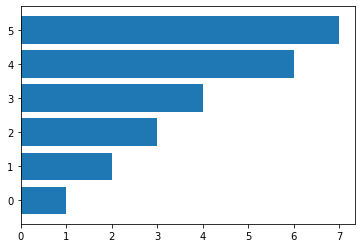

In [2]:
#수평막대그래프 barh()

plt.barh(range(6), [1,2,3,4,6,7])
plt.show()

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## gender.csv

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


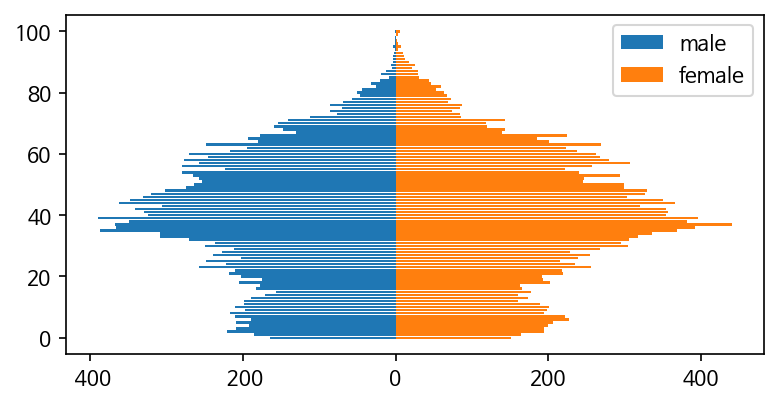

In [23]:
import csv

f = open('/content/drive/My Drive/gender.csv','r', encoding = 'cp949')
data = csv.reader(f,delimiter = ',')
m = []
f = []

for row in data:
  if '신도림' in row[0]:
    for i in range(0,101):
      m.append(-int(row[i+3]))
      f.append(int(row[-(i+1)]))

f.reverse()

# 항아리 그래프 만들기 위하여 한 데이터 음수화 

plt.figure(figsize = (6,3), dpi = 150)
plt.barh(range(101),m, label= 'male')
plt.barh(range(101),f, label = 'female')
plt.legend()
plt.show()


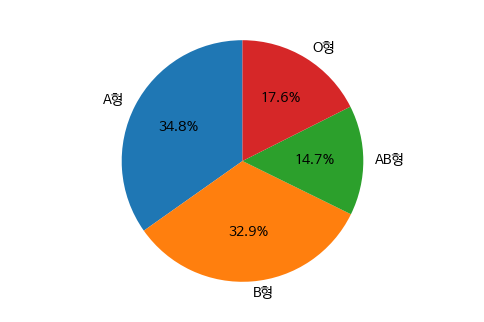

In [11]:
# pie() 함수
# 혈액형 비율 표현하기

size = [2441,2312,1031,1233]
label = ['A형','B형','AB형','O형']
plt.figure( dpi = 100)
plt.axis('equal')
plt.rc('font', family='NanumBarunGothic') 
plt.pie(size, labels = label, autopct = '%.1f%%',startangle = 90)
# autopct  계산해서 퍼센트 출력
# startangle 시작 축 변경
plt.show()

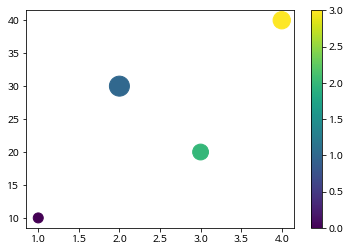

In [16]:
# 산점도 scatter()

import matplotlib.pyplot as plt

plt.scatter([1,2,3,4],[10,30,20,40],s=[100,400,250,300], c=range(4))
plt.colorbar()
plt.show()

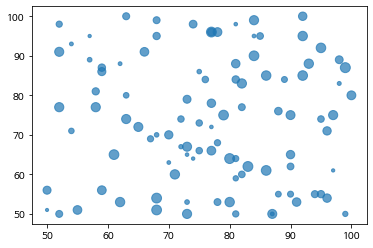

In [18]:
import random

x = []
y = []
size = []

for i in range(100):
  x.append(random.randint(50,100))
  y.append(random.randint(50,100))
  size.append(random.randint(10,100))

plt.scatter(x,y,s= size, alpha=0.7)
#alpha 투명도 기본 1
plt.show()

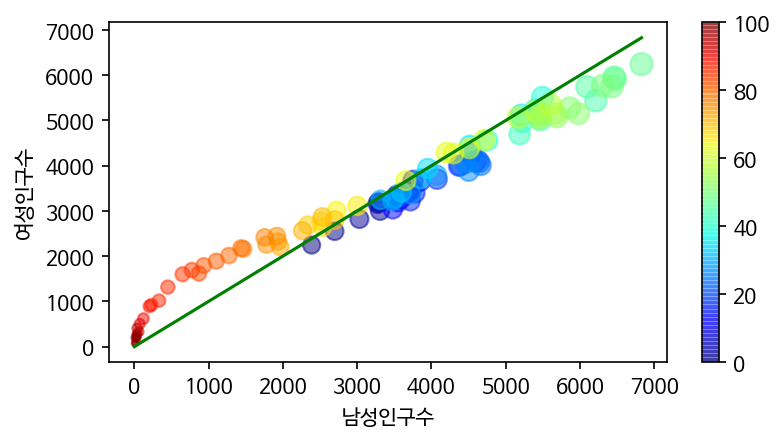

In [31]:
#제주도의 연령대별 성별 비율을 산점도로 표현하기

import csv
import matplotlib.pyplot as plt
import math
 
f = open('/content/drive/My Drive/gender.csv',encoding='cp949')
data = csv.reader(f,delimiter = ',')
m = []
f = []
size = []

for row in data:
  if '제주특별자치도' in row[0]:
    for i in range(3,104):
      m.append(int(row[i]))
      f.append(int(row[i+103]))
      size.append(math.sqrt(int(row[i]) + int(row[i+103])))
      # 원의 크기는 인구수의 제곱근
    break
    
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(6,3), dpi = 150)
plt.scatter(m,f,s = size, c = range(101), alpha= 0.5, cmap='jet') #컬러맵 적용
plt.colorbar()
plt.plot(range(max(m)),range(max(m)), color='g') # 추세선 추가
plt.xlabel('남성인구수')
plt.ylabel('여성인구수')
plt.show()


## subwayfee.csv

In [40]:
# 대중교통 데이터

# 승하차 별로 가장 많은 역 출력

f = open('/content/drive/My Drive/subwayfee.csv',encoding='cp949')
data = csv.reader(f,delimiter = ',')

next(data)
max = [0] *4
max_station = [' ']*4
rate = 0
label = ['유임승차', '유임하차', '무임승차', '무임하차']
for row in data:
  for i in range(4,8):
    row[i] = int(row[i])
    if row[i] > max[i-4]:
      max[i-4] = row[i]
      max_station[i-4] = row[3]+' '+row[1]

for i in range(4):
  print(label[i]+ ' : '+ max_station[i], max[i])

유임승차 : 강남 2호선 3153418
유임하차 : 강남 2호선 3210437
무임승차 : 종로3가 1호선 387062
무임하차 : 제기동 1호선 400607


## subwaytime.csv

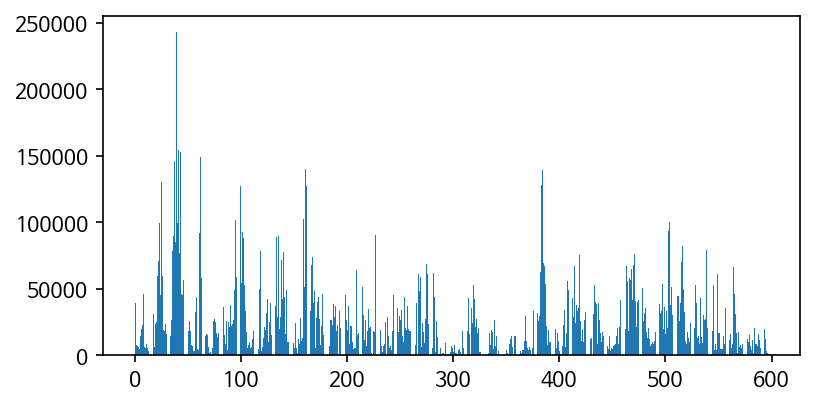

In [48]:
#지하철 시간대별 데이터 시각화하기

#아침 7시 승차 데이터 인원수 출력하기
import matplotlib.pyplot as plt

f = open('/content/drive/My Drive/subwaytime.csv',encoding='cp949')
data = csv.reader(f,delimiter = ',')

next(data)
next(data)
result = []

for row in data:
  row[4:] = map(int, row[4:])
  result.append(row[10])

plt.figure(figsize=(6,3),dpi = 150)
plt.bar(range(len(result)), result)
plt.show()

In [53]:
# 아침 7~9시 승차인원 최대역 찾기
import csv

f = open('/content/drive/My Drive/subwaytime.csv',encoding='cp949')
data = csv.reader(f,delimiter = ',')
next(data)
next(data)
max = 0
max_station = ' '

for row in data:
  row[4:] = map(int, row[4:])
  if sum(row[10:15:2]) >  max :
    max = sum(row[10:15:2])
    max_station = row[3] + '(' + row[1] + ')'

print(max_station, max)


신림(2호선) 809541
